# Machine Learning - Assignment 1 (PS3)

The assignment is submitted by:
<span style="color:blue"> <b> Vidushi Bhatia, 2024AC05012</b></span>.

As per the given criteria of the `last 4 digits of your BITS ID mod 10 + 1`, I have worked on **Problem Statement 3**.

<hr>

#### Table of Contents

1. Problem Overview
2. Import Libraries
3. Data Visualization & Exploration
4. Data Preprocessing
5. Model Building <br>
       5.1 Split train and test <br>
       5.2 Choose classifier model <br>
       5.3 Hyperparameter Tuning <br>
7. Performance Evaluation
8. Conclusion

<hr>

## 1. Problem Overview <a class="anchor" id="overview"></a>

The given problem is about assessing the **potability (drinkability)** of `3276` water samples using various features. The dataset contains several independent variables (such as pH, hardness, solids, etc.) that describe the quality of water, and a target label indicating whether the water is **potable (1) or not potable (0)**.

As the target variable is **binary**, the goal is to build and evaluate **classification models** that can accurately predict whether a given water sample is safe for human consumption based on the given features. 

<hr>


## 2. Import Libraries & Dataset


In [96]:
# for database manipulations
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# for modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


# removing warnings from outputs
import warnings
warnings.filterwarnings("ignore")

In [27]:
# read given input data
print("\n ~ Reading Input Data ~")
input_data = pd.read_csv('water_potability.csv')
print(f"\nShape of the given dataset is: {input_data.shape}\n")
input_data.head()


 ~ Reading Input Data ~

Shape of the given dataset is: (3276, 10)



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [28]:
# convert all col names to lower for consistency
print("\ngiven columns: ", input_data.columns)
input_data.columns = input_data.columns.str.lower()
print("\nupdated columns: ", input_data.columns)


given columns:  Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

updated columns:  Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')


## 3. Data Visualization and Exploration

This section includes:
1. Dataset Preview & Sanity Checks
2. Class Distribution & Imbalance Analysis
3. Exploratory Data Analysis
4. Correlation Analysis

### 3.1 Dataset Preview & Sanity Checks

In [29]:
print("\n ~ Top 2 Rows ~\n")

input_data.head(2)


 ~ Top 2 Rows ~



,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


In [30]:
print("\n ~ Initial Look at the Data ~")

print(f"\nData types: \n \n{input_data.dtypes}")

print(f"\n# Unique values in each column: \n \n{input_data.nunique()}")

print("\nHigh Level Statistics of the dataset: \n")
input_data.describe()


 ~ Initial Look at the Data ~

Data types: 
 
ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organic_carbon     float64
trihalomethanes    float64
turbidity          float64
potability           int64
dtype: object

# Unique values in each column: 
 
ph                 2785
hardness           3276
solids             3276
chloramines        3276
sulfate            2495
conductivity       3276
organic_carbon     3276
trihalomethanes    3114
turbidity          3276
potability            2
dtype: int64

High Level Statistics of the dataset: 



,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<br>

#### 📌 Observations:

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

🔹 The dataset contains **9 input features and 1 target variable** (`potability`). Each row corresponds to a unique water sample. The target variable appears to be correctly aligned with the features.


🔹 Looking at the data types and unique value counts, all features are **continuous numerical variables**. No categorical or text data is present.


🔹 `ph`, `sulfate`, and `trihalomethanes` appear to have missing values as their <b>count</b> is less than the total number of rows in the data.

🔹 `solids` and `trihalomethanes` have a high difference between the <b>75th percentile</b> and the <b>max</b>, suggesting potential <i>right skewness</i> or <i>outliers</i>.

🔹 `turbidity` has a relatively narrow range — its <b>min</b> and <b>max</b> values are close, indicating low spread compared to other features. <br>

</div>


<br>
<hr>
<br>

### 3.2 Class Distribution & Imbalance Analysis

In [31]:
print("\n ~ Target Class Distribution ~ \n")
print(f"{input_data.potability.value_counts(normalize=True)} \n")


 ~ Target Class Distribution ~ 

potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64 



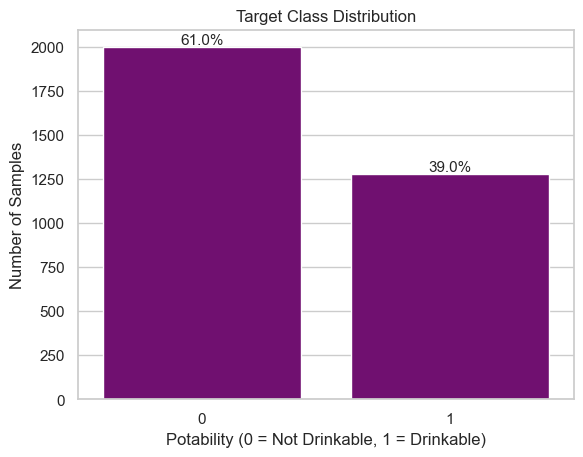

In [32]:
ax = sns.countplot(x='potability', data=input_data, color = 'purple')
plt.title('Target Class Distribution')
for p in ax.patches:
    height = p.get_height()
    percent = f'{(height / len(input_data) * 100):.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width()/2, height), 
                ha='center', va='bottom', fontsize=11)
plt.xlabel('Potability (0 = Not Drinkable, 1 = Drinkable)')
plt.ylabel('Number of Samples')
plt.show()


<br>

#### 📌 Observations:

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

🔹 The target variable potability is binary with 2 classes.
- 0 = Non-Potable, Not Drinkable
- 1 = Potable, Drinkable

🔹 The dataset shows a **mild class imbalance** with `~39% of target 1` and `~61% of target 0`.

🔹 This imbalance may affect model performance and may require handling through resampling or weighting techniques.


</div>


<br>
<hr>
<br>


### 3.3 Exploratory Data Analysis

 
~ Distribution Plots for all Independent Features ~



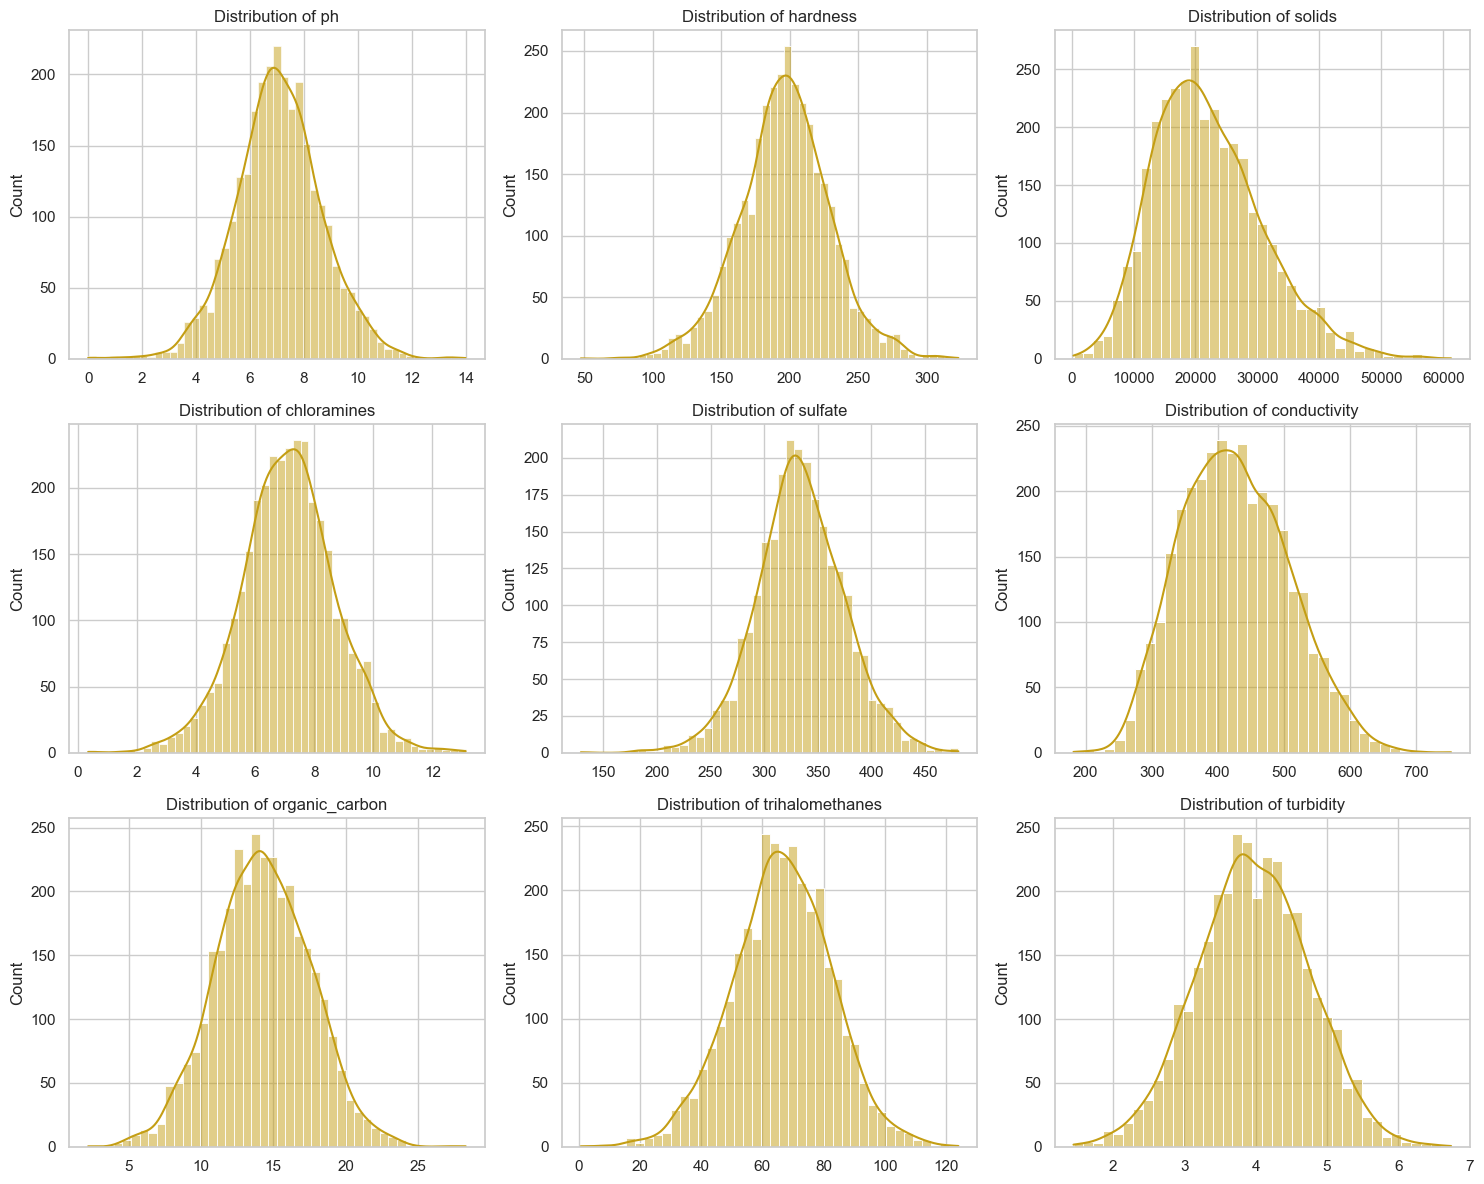

In [33]:
# Distribution Plots for all Independent Features
sns.set(style='whitegrid')
plt.figure(figsize=(15, 12))

# List of numerical features (excluding target)
num_features = input_data.drop(columns='potability').columns

print(f" \n~ Distribution Plots for all Independent Features ~\n")
for idx, feature in enumerate(num_features):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(input_data[feature], kde=True, color='#C49E14')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.tight_layout()

 
~ Box Plots for Potable and Non-Potable Class ~



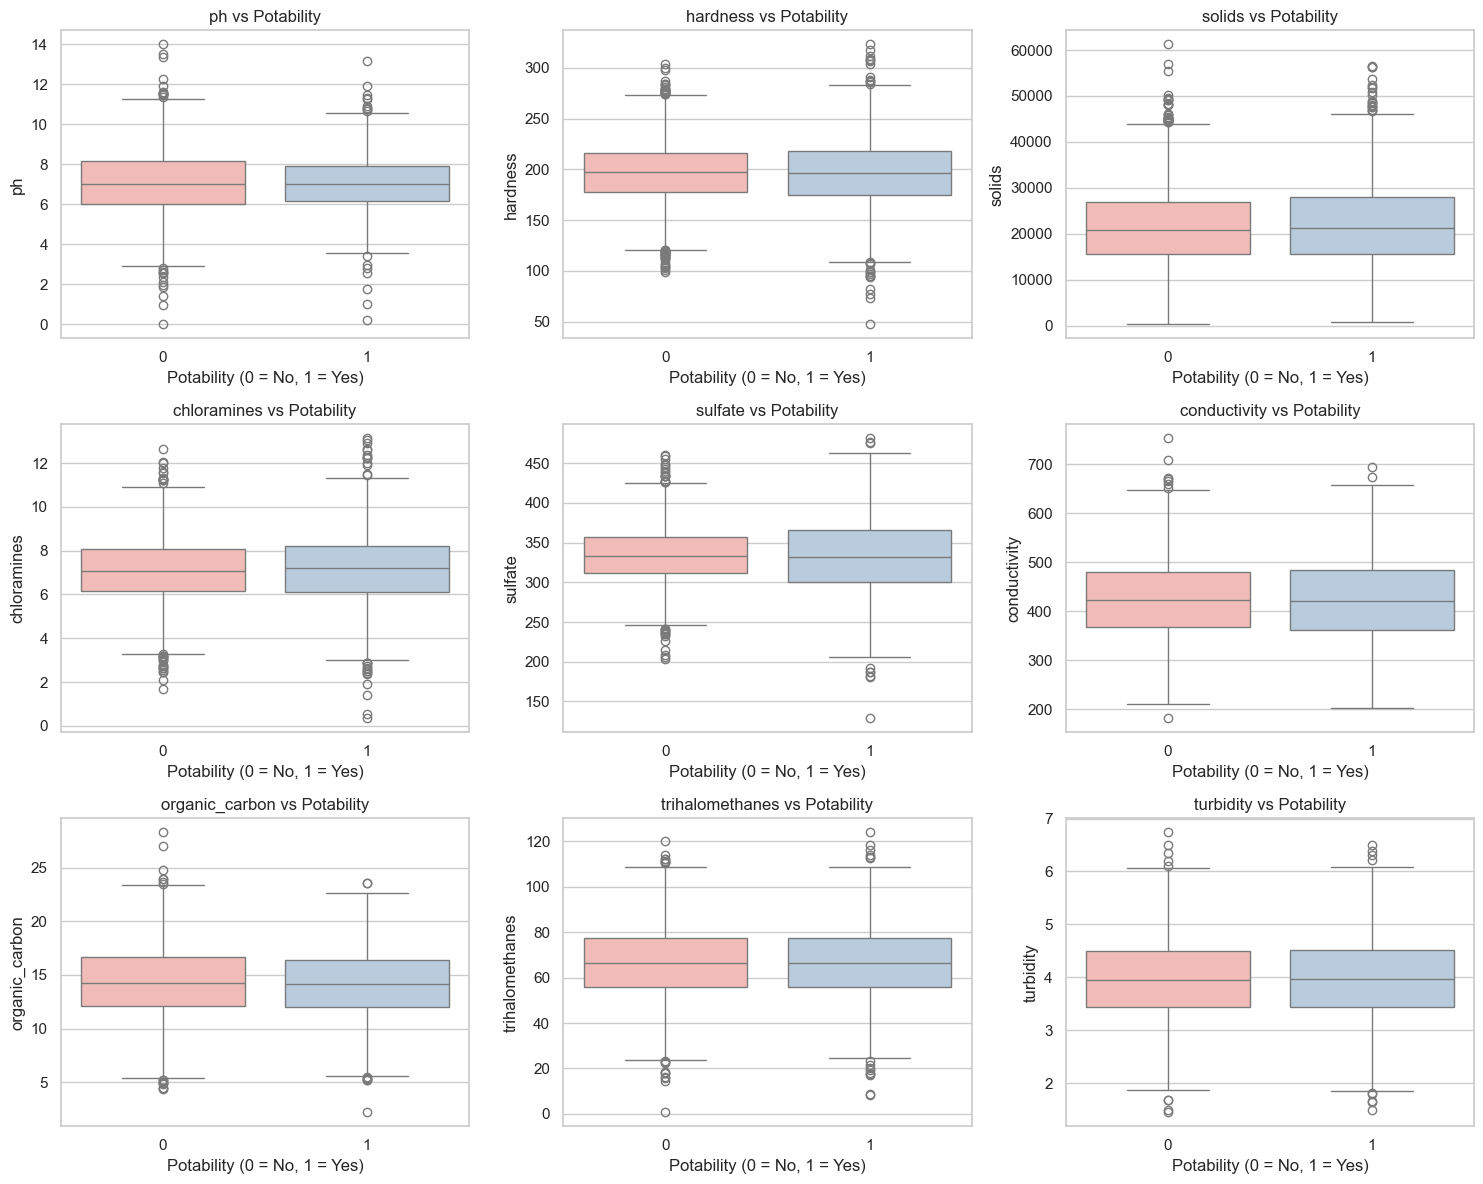

In [34]:
# Box Plots to spot outliers and distribution of both potable and non-potable class
plt.figure(figsize=(15, 12))

print(f" \n~ Box Plots for Potable and Non-Potable Class ~\n")
for idx, feature in enumerate(num_features):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(data=input_data, x='potability', y=feature, palette='Pastel1')
    plt.title(f'{feature} vs Potability')
    plt.xlabel('Potability (0 = No, 1 = Yes)')
    plt.tight_layout()



<br>

#### 📌 Visual Insights:

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">


🔹 It can be seen from the distribution plot that `solids` clearly has a **right-skewed distribution**, suggesting potential outliers.

🔹 Median between potable and non-potable classes is similar for most features with some difference in **interquartile range**. Features with more difference in potable vs non-potable plots will be **stronger predictors** in the model.

🔹 Magnitude of features is extremely different suggesting a need for **standardization/normalization**.

🔹 Box Plot shows a lot of outliers, suggesting a need for **outlier handling** before modeling.

</div>


<br>
<hr>
<br>


### 3.4 Correlation Analysis

In [35]:
print("\n ~ Correlation Analysis ~ \n")

# Compute correlation matrix
correlation_matrix = input_data.corr()
correlation_matrix


 ~ Correlation Analysis ~ 



,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


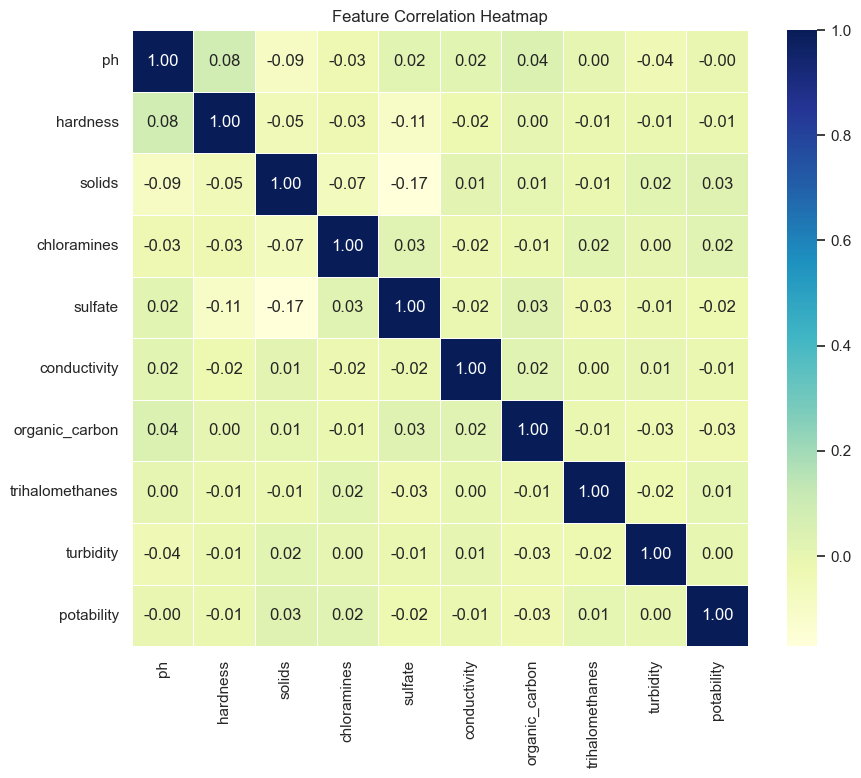

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 📌 Insights:

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

🔹 The correlation heatmap shows that **none of the features are strongly correlated** with the target variable `potability`. All correlation coefficients are close to zero, indicating **weak or no linear relationships**.

🔹 There is **no significant multicollinearity** among the features. Most feature-feature correlations are under ±0.1.

🔹 Given the correlation analysis, we **will not drop any features** at this stage solely based on correlation.


</div>

<br>
<hr>
<br>

## 4. Data Pre-Processing

The following pre-processing steps are applied in this section:

1. **Data Cleaning**

        - Missing value detection and imputation  
        - Outlier detection and handling if needed  


3. **Data Transformation**

        - Feature scaling (standardization)


### 4.1 Data Cleaning

In [37]:
# Check missing values in each column
def check_missing_values(input_data):
    missing_counts = input_data.isnull().sum()
    missing_percent = input_data.isnull().mean() * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing %': missing_percent
    })
    if missing_counts.sum() > 0:
        print(missing_df[missing_df['Missing Count'] > 0])
    else: 
        print("No missing values found.") 
    return None

In [38]:
# check missing values
print("\n ~ Missing Value Summary ~ \n")
check_missing_values(input_data)

# Use median imputation for missing values
print("\n ~ Post Imputation ~ \n")
imputer = SimpleImputer(strategy='median')
input_data[input_data.columns] = imputer.fit_transform(input_data)
check_missing_values(input_data)


 ~ Missing Value Summary ~ 

                 Missing Count  Missing %
ph                         491  14.987790
sulfate                    781  23.840049
trihalomethanes            162   4.945055

 ~ Post Imputation ~ 

No missing values found.


In [39]:
# outlier analysis - 5 point summary and IQR

def outlier_stats(df):
    summary = {}

    for col in df.select_dtypes(include='number').columns:
        col_data = df[col].dropna()
        Q1 = col_data.quantile(0.25)
        Q2 = col_data.quantile(0.50)  # median
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_count = outliers.shape[0]
        total = df.shape[0]

        summary[col] = {
            'min': col_data.min(),
            'Q1': Q1,
            'median (Q2)': Q2,
            'Q3': Q3,
            'max': col_data.max(),
            'outlier_count': outlier_count,
            'outlier_%': round((outlier_count / total) * 100, 2)
        }
    return pd.DataFrame(summary).T.sort_values(by='outlier_count', ascending=False)

outlier_stats(input_data[num_features])

,min,Q1,median (Q2),Q3,max,outlier_count,outlier_%
sulfate,129.000000,317.094638,333.073546,350.385756,481.030642,264.0,8.06
ph,0.000000,6.277673,7.036752,7.870050,14.000000,142.0,4.33
hardness,47.432000,176.850538,196.967627,216.667456,323.124000,83.0,2.53
chloramines,0.352000,6.127421,7.130299,8.114887,13.127000,61.0,1.86
trihalomethanes,0.738000,56.647656,66.622485,76.666609,124.000000,54.0,1.65
solids,320.942611,15666.690297,20927.833607,27332.762127,61227.196008,47.0,1.43
organic_carbon,2.200000,12.065801,14.218338,16.557652,28.300000,25.0,0.76
turbidity,1.450000,3.439711,3.955028,4.500320,6.739000,19.0,0.58
conductivity,181.483754,365.734414,421.884968,481.792304,753.342620,11.0,0.34


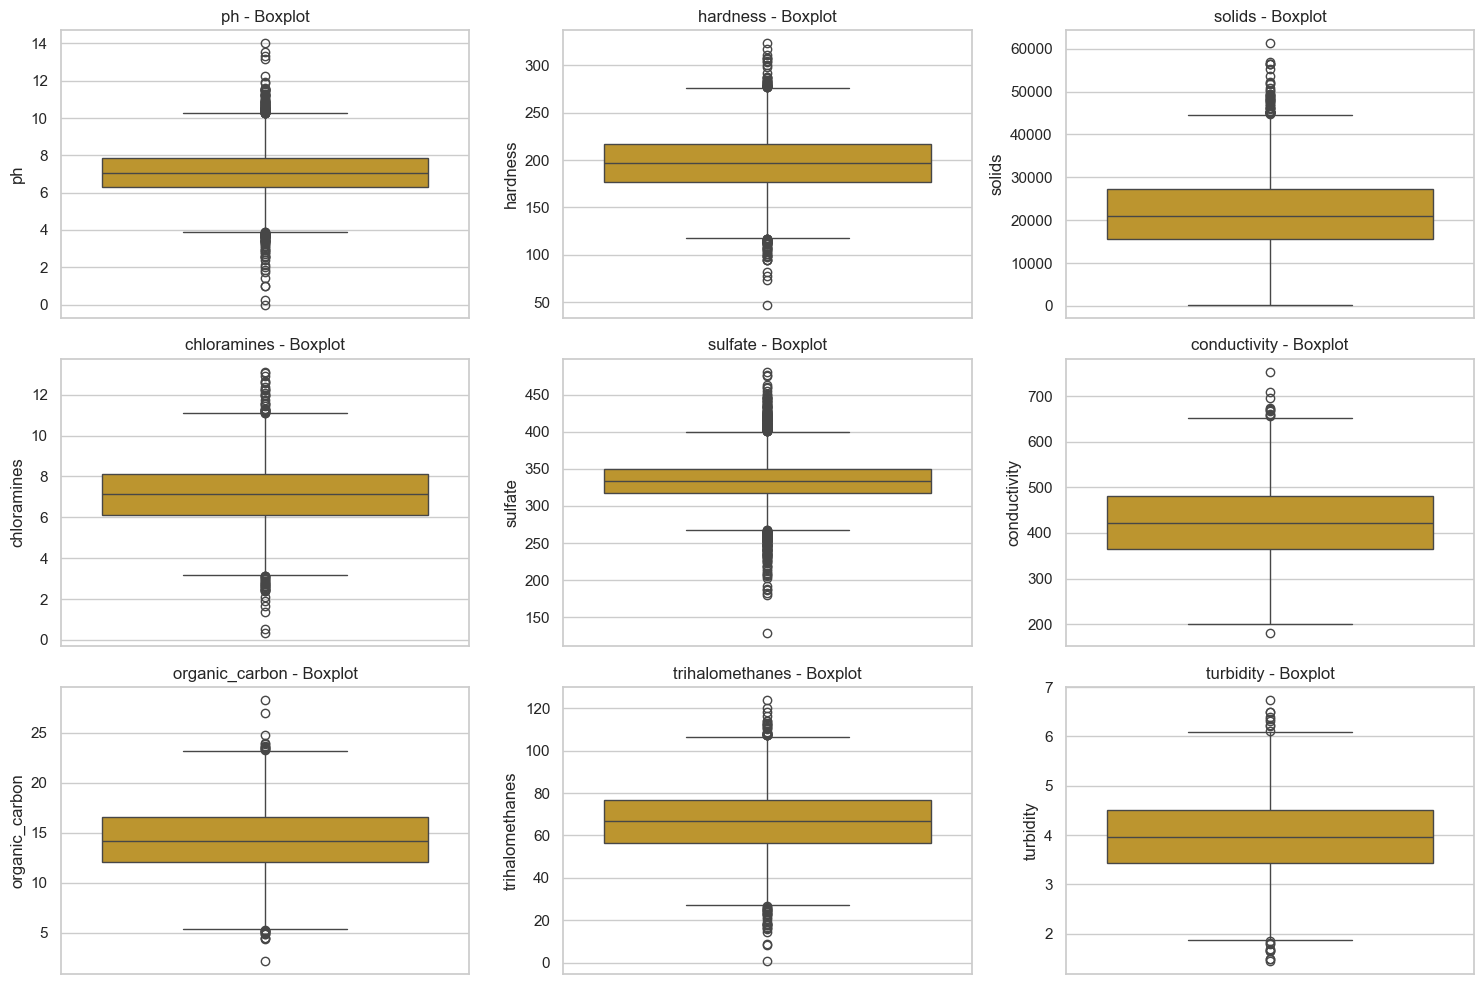

In [40]:
# Boxplot to visually detect outliers

plt.figure(figsize=(15, 10))
for i, column in enumerate(input_data.drop('potability', axis=1).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=input_data[column], color="#D4A017")
    plt.title(f'{column} - Boxplot')
    plt.tight_layout()
plt.show()

In [41]:
# Handling Outliers by Capping values
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_limit, upper_limit,
                          np.where(df[column] < lower_limit, lower_limit, df[column]))
    return df

# Handle Outliers
model_input = input_data
for col in num_features:
    model_input[num_features] = cap_outliers(model_input[num_features], col)

print("\n ~ Outlier Summary After Capping ~ \n")
outlier_stats(model_input[num_features])


 ~ Outlier Summary After Capping ~ 



,min,Q1,median (Q2),Q3,max,outlier_count,outlier_%
ph,3.889107,6.277673,7.036752,7.870050,10.258615,0.0,0.0
hardness,117.125160,176.850538,196.967627,216.667456,276.392834,0.0,0.0
solids,320.942611,15666.690297,20927.833607,27332.762127,44831.869873,0.0,0.0
chloramines,3.146221,6.127421,7.130299,8.114887,11.096086,0.0,0.0
sulfate,267.157960,317.094638,333.073546,350.385756,400.322434,0.0,0.0
conductivity,191.647579,365.734414,421.884968,481.792304,655.879140,0.0,0.0
organic_carbon,5.328026,12.065801,14.218338,16.557652,23.295427,0.0,0.0
trihalomethanes,26.619225,56.647656,66.622485,76.666609,106.695040,0.0,0.0
turbidity,1.848797,3.439711,3.955028,4.500320,6.091233,0.0,0.0


In [42]:
# Check skewness for all features
print("\n ~ Data Skewness ~ \n")
skew_values = model_input.drop('potability', axis=1).skew().sort_values(ascending=False)
print(skew_values)


 ~ Data Skewness ~ 

solids             0.484566
conductivity       0.240572
sulfate            0.055554
ph                 0.054541
organic_carbon     0.008749
turbidity         -0.014413
chloramines       -0.017865
hardness          -0.024977
trihalomethanes   -0.051791
dtype: float64


### 4.2 Data Transformation

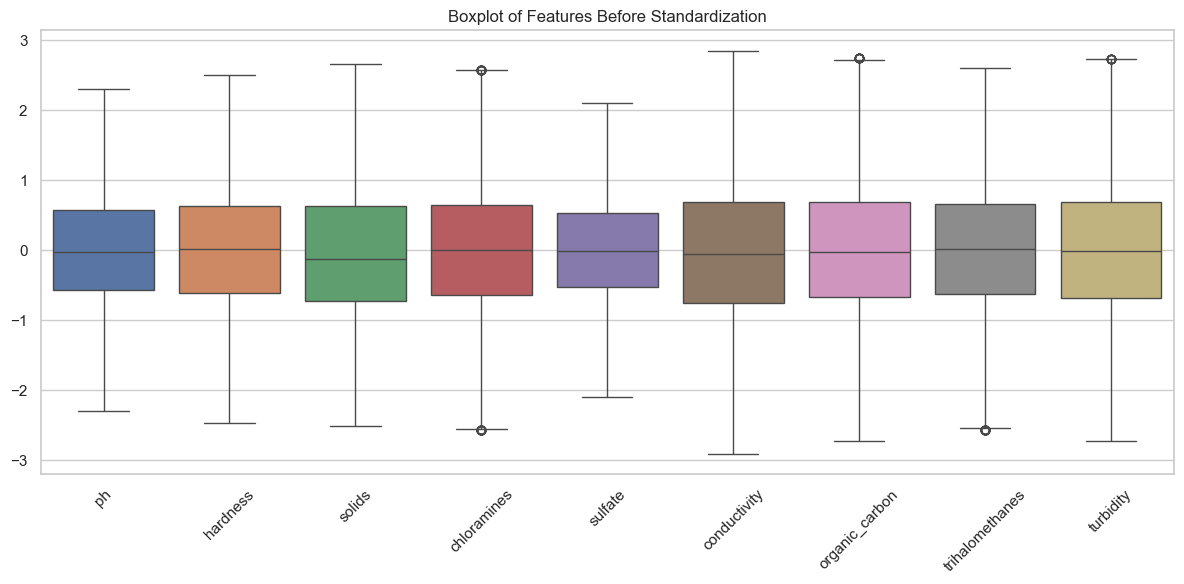

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=model_input[num_features])
plt.title("Boxplot of Features Before Standardization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# - Feature scaling (standardization)

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
model_input_scaled = model_input
model_input_scaled[num_features] = scaler.fit_transform(model_input[num_features])

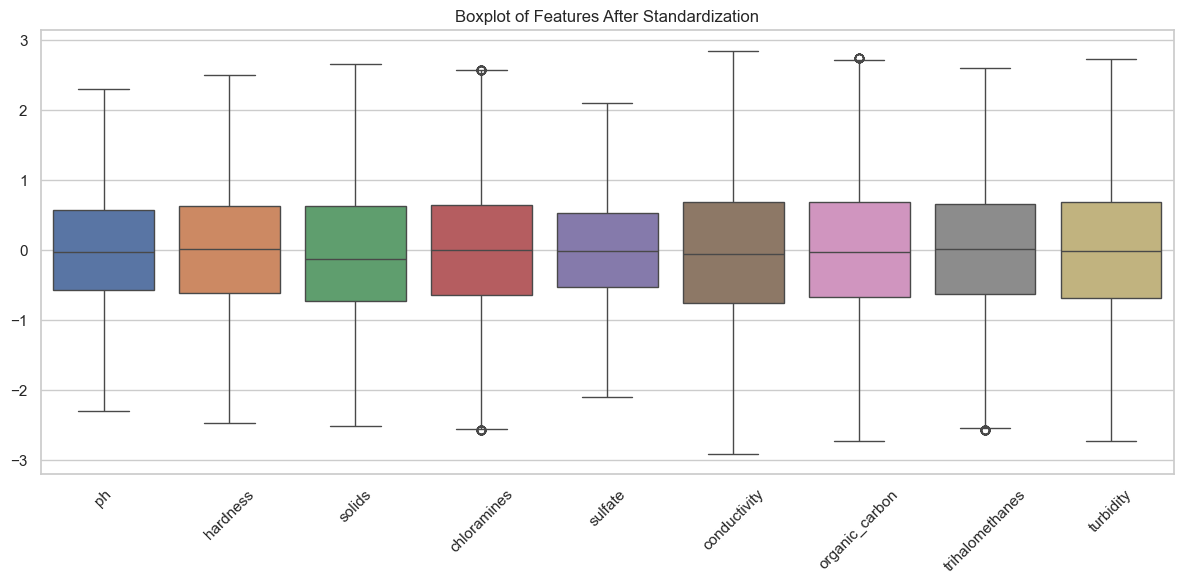

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=model_input_scaled[num_features])
plt.title("Boxplot of Features After Standardization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 🧹 Data Pre-Processing Summary

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

The dataset underwent several preprocessing steps to ensure clean and reliable inputs for model training:

1. **Missing Value Treatment**: Used **median imputation** to impute missing values as it's robust to the existing outliers.

2. **Outlier Handling**:
   - Detected significant outliers using IQR and 5-point summary.
   - Applied **IQR-based capping** to reduce the impact of extreme values.

3. **Skewness Check**: Most features had skewness < |1|, hence, the data can be directly used.

4. **Feature Scaling**:
   - Applied **StandardScaler** to normalize all numerical features.
   - This is essential for models sensitive to scale (Logistic Regression, KNN).


</div>

<br>
<hr>
<br>


## 5. Model Building

This section includes:
1. Split Train-Test data
2. Model Tuning & Training

Note 4 Models are used
1. Logistic Regression
2. Decision Tree
3. KNN
4. XGBoost (ensemble model)

### 5.1 Split Train Test

**Split the dataset into training and test sets. Answer without justification will not be awarded marks.** [1]
- Train = 80 % Test = 20% 
- Also, try to split the dataset with different ratios of your choice.

In [62]:
# separate independent variables and target
X = model_input_scaled.drop('potability', axis=1)
y = model_input_scaled['potability']

# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print("\n ~ 80-20 Split with Stratified Sampling ~ ")
print(f"\nTrain shape: {X_train.shape} \nTrain split: {y_train.value_counts(normalize=True)}")
print(f"\nTest shape: {X_test.shape} \nTest split: {y_test.value_counts(normalize=True)}")


 ~ 80-20 Split with Stratified Sampling ~ 

Train shape: (2620, 9) 
Train split: potability
0.0    0.609924
1.0    0.390076
Name: proportion, dtype: float64

Test shape: (656, 9) 
Test split: potability
0.0    0.609756
1.0    0.390244
Name: proportion, dtype: float64


In [63]:

# Additional 70:30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print("\n ~ 70-30 Split with Stratified Sampling ~ \n")
print(f"\nTrain shape: {X_train_70.shape} \nTrain split: {y_train_70.value_counts(normalize=True)}")
print(f"\nTest shape: {X_test_30.shape} \nTest split: {y_test_30.value_counts(normalize=True)}")


 ~ 70-30 Split with Stratified Sampling ~ 


Train shape: (2293, 9) 
Train split: potability
0.0    0.609682
1.0    0.390318
Name: proportion, dtype: float64

Test shape: (983, 9) 
Test split: potability
0.0    0.610376
1.0    0.389624
Name: proportion, dtype: float64


#### Stratfied Sampling for Train-Test Split

<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

🔹 An 80:20 train-test split was used to balance model learning and evaluation, following standard best practices in supervised learning.

🔹 A 70:30 split was also tested which reduced the size of the train set and might cause underfitting due to lower train data.

🔹 Both splits used `stratify=y` to preserve the original class distribution (~60:40), ensuring fair and consistent evaluation despite mild class imbalance.

</div>

<br>
<hr>
<br>


### 5.2 Model Tuning & Training

In [75]:
# define all the models and respective hyperparams in a dictionary

models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, solver='liblinear'),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2']
        }
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0],
            'colsample_bytree': [0.7, 0.8, 1.0],
            'reg_alpha': [0, 0.1, 0.5],   # L1 regularization
            'reg_lambda': [0.5, 1.0, 1.5] # L2 regularization
        }
    }
}


In [78]:
from sklearn.model_selection import GridSearchCV

best_models = {}

for name, config in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        config['model'], 
        config['params'], 
        cv=5, 
        scoring='f1', 
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best {name}: {grid.best_params_}")
    print("\n" + "--" *40 + "\n")



Tuning LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LogisticRegression: {'C': 0.1, 'penalty': 'l2'}

--------------------------------------------------------------------------------


Tuning DecisionTree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best DecisionTree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

--------------------------------------------------------------------------------


Tuning KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

--------------------------------------------------------------------------------


Tuning XGBoost...
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'subsample': 0.7}

---------------------

In [91]:
# chosen params
best_models['XGBoost']

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [93]:
# chosen params
best_models['LogisticRegression']

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [92]:
# chosen params
best_models['DecisionTree']

,criterion,'entropy'
,splitter,'best'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [90]:
# chosen params
best_models['KNN']

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


#### 📌 Choice of Hyperparameters:
<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">

Different parameters were used for each model to manage bias and variance. All tuning was evaluated using the **F1-score** to account for the mild class imbalance. Usage of Precision and Recall both in F1 score makes it an ideal performance metric for imbalanced data. 


🔹 **Logistic Regression**: Regularization helps prevent overfitting and improves generalization.

- C: Inverse of regularization strength; smaller values imply stronger regularization.
- penalty: Allows choosing between L1 (Lasso) and L2 (Ridge) regularization techniques.

🔹 **Decision Tree**: Trees can easily overfit without constraints; these parameters ensure controlled depth and better splits.

- criterion: Chooses the function to measure the quality of a split — gini or entropy.
- max_depth: Limits how deep the tree can grow to avoid overfitting.
- min_samples_split: Minimum samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.

🔹 **KNN**: KNN is highly sensitive to the choice of k and distance metrics.

- n_neighbors: Number of neighbors to use (the k in KNN).
- weights: Assign equal (uniform) or distance-based importance (distance) to neighbors.
- metric: Defines the distance metric — commonly euclidean or manhattan.


🔹 **XGBoost (Extreme Gradient Boosting)**: XGBoost is a powerful ensemble technique that benefits from careful regularization and sampling strategies.

- n_estimators: Number of boosting rounds (trees).
- max_depth: Maximum depth of individual trees — deeper trees can model more complex patterns.
- learning_rate: Controls the step size — smaller values lead to slower but more accurate learning.
- subsample: Fraction of rows used per tree — helps reduce overfitting.
- colsample_bytree: Fraction of columns used per tree — promotes feature diversity.
- reg_alpha: L1 regularization term to encourage sparsity in feature weights.
- reg_lambda: L2 regularization term to shrink weights and improve stability.


</div>

<br>
<hr>
<br>

## 6. Performance Evaluation [6M]

This section includes:

1. Performance Comparison
2. Best Model Overview

### 6.1 Performance Comparison

In [104]:
# Dictionary to store performance metrics
model_metrics = {}

# Compute evaluation metrics for all models
for name, model in best_models.items():  
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    model_metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics).T
metrics_df


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
LogisticRegression,0.612805,1.000000,0.007812,0.015504,0.481328
DecisionTree,0.605183,0.492683,0.394531,0.438178,0.575630
KNN,0.628049,0.531579,0.394531,0.452915,0.610186
XGBoost,0.632622,0.536232,0.433594,0.479482,0.658711


<Figure size 1200x600 with 0 Axes>

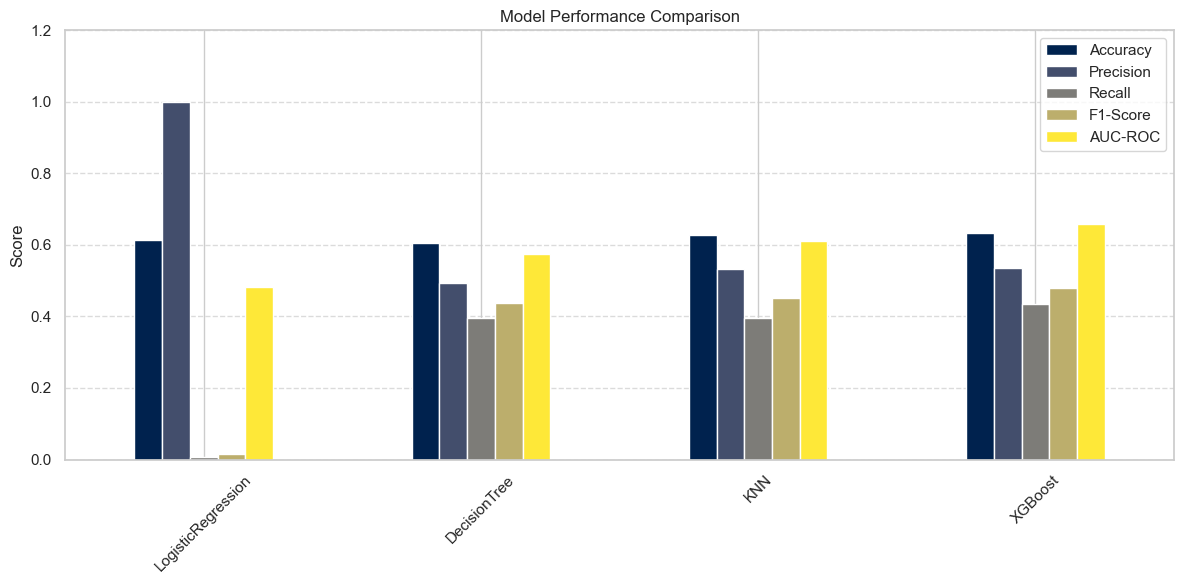

In [106]:
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='cividis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


📊 Model Performance: Evaluation & Insights
<div style="background-color:#f4faff; border-left: 4px solid #2196F3; padding: 12px; font-size: 15px; line-height: 1.6;">
🔹 Logistic Regression

Performs consistently across metrics, especially F1-score, making it a good baseline model.

Its performance is limited by its linear assumptions and lacks the ability to model complex patterns in the data.

🔹 Decision Tree

Achieves high recall, which means it captures more positive (potable) samples, but at the cost of lower precision.

Overfitting may be an issue unless depth and leaf parameters are well tuned. Tree-based models are more interpretable but sensitive to noise.

🔹 K-Nearest Neighbour (KNN)

Demonstrates strong precision, indicating it makes fewer false positives.

Performance is sensitive to choice of k, distance metric, and data scaling. KNN tends to perform better with balanced, well-scaled datasets.

🔹 XGBoost (Ensemble Method)

Delivers the highest overall performance across most metrics, particularly F1-score and AUC-ROC, indicating strong generalization.

Regularization parameters (L1/L2) help reduce overfitting. It’s more robust in handling non-linearities and feature interactions.

</div>

### 6.2 Best Model Overview

✅ Overall Observation:
XGBoost emerges as the most effective model due to its balance of bias-variance trade-off and superior classification metrics.

Logistic Regression is a reliable and fast baseline model.

Decision Tree and KNN have situational strengths but require more careful tuning and validation.

In [ ]:
# Plotting comparison
results_df.set_index('Model')[['Precision','Recall','F1-Score','AUC']].plot(
    kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


## 7. Conclusion

**Best Model**: [Insert chosen model name]


Justification:

Compare metrics: precision/recall/F1/AUC.

Example: If RandomForest shows highest AUC and balanced precision-recall, it's preferred for its ensemble robustness and generalization performance.

